## IMPORTING LIBRARYS

In [33]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.datasets import fetch_california_housing 
from mpl_toolkits.basemap import Basemap
import plotly.express as px
from xgboost import XGBRegressor

## GETTING DATA

In [34]:
pure_data= fetch_california_housing()  
df=pd.DataFrame(data=pure_data.data,columns=pure_data.feature_names) 
df['MedHouseVal']=pure_data.target 
df=df.sample(frac=1) 
df 
X=df.drop(columns=['MedHouseVal'],axis=1)
y=df['MedHouseVal'] 
df 

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
18333,2.1406,19.0,2.847742,1.045161,1304.0,1.682581,37.45,-122.16,4.025
6137,3.0806,8.0,4.534676,1.073826,1781.0,3.984340,34.08,-117.97,1.424
4917,1.8641,43.0,3.577997,1.119869,2624.0,4.308703,34.01,-118.26,1.082
2185,3.4861,26.0,5.588462,0.965385,896.0,3.446154,36.74,-119.98,1.125
18977,3.8583,11.0,5.832591,1.023152,3570.0,3.178985,38.25,-122.01,1.379
...,...,...,...,...,...,...,...,...,...
1631,7.6107,33.0,7.554167,1.045833,1348.0,2.808333,37.88,-122.17,4.232
166,1.6121,41.0,3.561743,1.135593,1062.0,2.571429,37.80,-122.25,1.714
9971,4.1993,23.0,6.069252,1.149584,959.0,2.656510,38.50,-122.47,2.145
405,6.1740,52.0,7.639831,1.016949,572.0,2.423729,37.90,-122.27,3.588


In [35]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
18333,2.1406,19.0,2.847742,1.045161,1304.0,1.682581,37.45,-122.16
6137,3.0806,8.0,4.534676,1.073826,1781.0,3.984340,34.08,-117.97
4917,1.8641,43.0,3.577997,1.119869,2624.0,4.308703,34.01,-118.26
2185,3.4861,26.0,5.588462,0.965385,896.0,3.446154,36.74,-119.98
18977,3.8583,11.0,5.832591,1.023152,3570.0,3.178985,38.25,-122.01
...,...,...,...,...,...,...,...,...
1631,7.6107,33.0,7.554167,1.045833,1348.0,2.808333,37.88,-122.17
166,1.6121,41.0,3.561743,1.135593,1062.0,2.571429,37.80,-122.25
9971,4.1993,23.0,6.069252,1.149584,959.0,2.656510,38.50,-122.47
405,6.1740,52.0,7.639831,1.016949,572.0,2.423729,37.90,-122.27


In [36]:
y

18333    4.025
6137     1.424
4917     1.082
2185     1.125
18977    1.379
         ...  
1631     4.232
166      1.714
9971     2.145
405      3.588
7673     1.651
Name: MedHouseVal, Length: 20640, dtype: float64

In [37]:
df = pd.concat([X,y],axis=1)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
18333,2.1406,19.0,2.847742,1.045161,1304.0,1.682581,37.45,-122.16,4.025
6137,3.0806,8.0,4.534676,1.073826,1781.0,3.984340,34.08,-117.97,1.424
4917,1.8641,43.0,3.577997,1.119869,2624.0,4.308703,34.01,-118.26,1.082
2185,3.4861,26.0,5.588462,0.965385,896.0,3.446154,36.74,-119.98,1.125
18977,3.8583,11.0,5.832591,1.023152,3570.0,3.178985,38.25,-122.01,1.379
...,...,...,...,...,...,...,...,...,...
1631,7.6107,33.0,7.554167,1.045833,1348.0,2.808333,37.88,-122.17,4.232
166,1.6121,41.0,3.561743,1.135593,1062.0,2.571429,37.80,-122.25,1.714
9971,4.1993,23.0,6.069252,1.149584,959.0,2.656510,38.50,-122.47,2.145
405,6.1740,52.0,7.639831,1.016949,572.0,2.423729,37.90,-122.27,3.588


## VISUALIZING DATA

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20640 entries, 18333 to 7673
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.6 MB


In [39]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
18333,2.1406,19.0,2.847742,1.045161,1304.0,1.682581,37.45,-122.16,4.025
6137,3.0806,8.0,4.534676,1.073826,1781.0,3.984340,34.08,-117.97,1.424
4917,1.8641,43.0,3.577997,1.119869,2624.0,4.308703,34.01,-118.26,1.082
2185,3.4861,26.0,5.588462,0.965385,896.0,3.446154,36.74,-119.98,1.125
18977,3.8583,11.0,5.832591,1.023152,3570.0,3.178985,38.25,-122.01,1.379


In [40]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [41]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


### distribution of target values

/tmp/ipykernel_61806/2744617800.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  fig=sns.displot(y,palette='pastel')


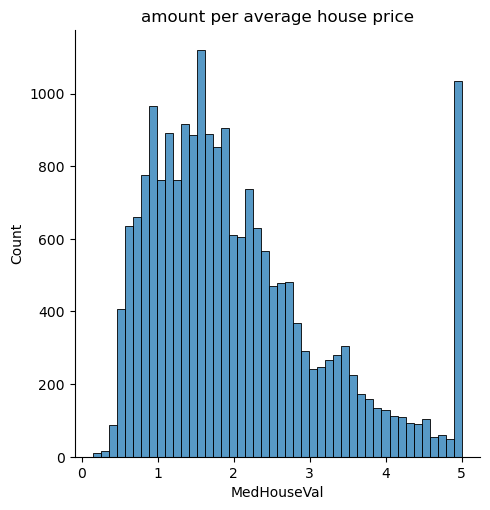

In [42]:
fig=sns.displot(y,palette='pastel') 
plt.title('amount per average house price')  
plt.show() 

### showing heat map of correlation matrix 

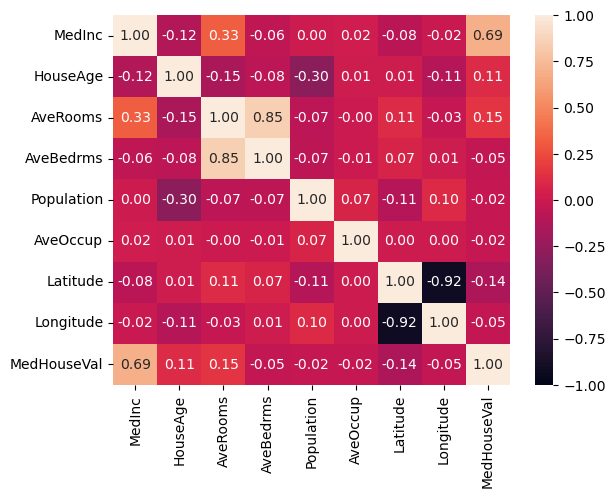

In [43]:
sns.heatmap(data=df.corr(),annot=True, fmt=".2f",mask=None,vmin=-1.0, vmax=1.0) 
plt.show()

### showing average house price per region

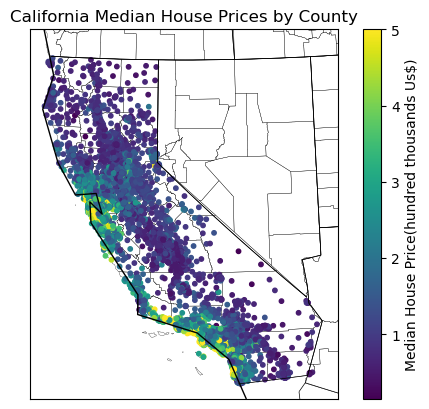

In [44]:
m = Basemap(
    projection='lcc',
    resolution='c',
    lat_0=37.5, lon_0=-119,
    width=1E6, height=1.2E6
)

# Draw county boundaries
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.drawcounties(linewidth=0.2) 
#m.drawcounties(facecolor=df['MedHouseVal']) 

# Scatter plot median house prices on the map
# Replace 'lat' and 'lon' with your latitude and longitude columns
m.scatter(df['Longitude'], df['Latitude'], latlon=True, c=df['MedHouseVal'], cmap='viridis', marker='o', s=10)

# Add colorbar
plt.colorbar(label='Median House Price(hundred thousands Us$)')

# Add title
plt.title('California Median House Prices by County')

# Show the map
plt.show()

#### interactive

### reducing dimensions to see scatterplot with tsne

In [45]:
from sklearn.manifold import TSNE
df_tsne_sample=df.sample(frac=0.2) 
X_tsne_sample=df_tsne_sample.drop(columns=['MedHouseVal']) 
y_tsne_sample=df_tsne_sample['MedHouseVal']
tsne=TSNE(n_components=1,random_state=200)  #we apply the random state so that its not different everytime we restar 
array_red=tsne.fit_transform(X_tsne_sample) #applying dimensional reductioon on array  
df_tsne=pd.DataFrame(array_red,columns=['COMP1']) # making it into a pandas dataframe for easier viewing 
df_tsne = df_tsne.reset_index(drop=True)
y_tsne_sample = y_tsne_sample.reset_index(drop=True)
df_tsne

,COMP1
0,37.087154
1,14.695783
2,26.173454
3,-94.237946
4,96.983330
...,...
4123,44.500668
4124,52.553413
4125,128.789032
4126,13.055467


In [46]:
df_tsne['target']=y_tsne_sample
df_tsne

,COMP1,target
0,37.087154,2.02900
1,14.695783,1.85300
2,26.173454,3.34300
3,-94.237946,0.52000
4,96.983330,0.86900
...,...,...
4123,44.500668,5.00001
4124,52.553413,2.58100
4125,128.789032,1.19400
4126,13.055467,4.04300


In [47]:
array_red

array([[ 37.087154],
       [ 14.695783],
       [ 26.173454],
       ...,
       [128.78903 ],
       [ 13.055467],
       [-67.356125]], dtype=float32)

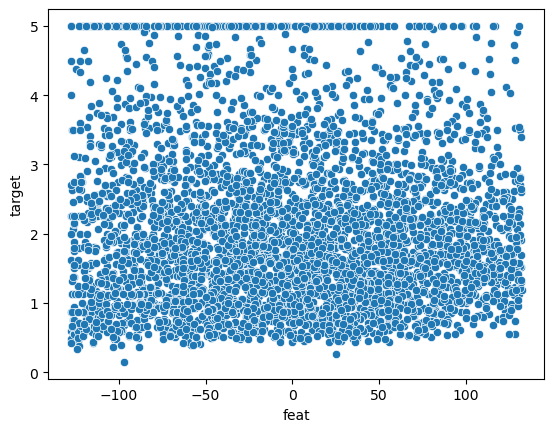

In [48]:
sns.scatterplot(data=df_tsne,x='COMP1',y='target') 
plt.xlabel("feat") 
plt.ylabel("target") 
plt.show() 

### using dimensiality reduction with PCA

In [49]:
from sklearn.decomposition import PCA   
df_pca_sample=df.sample(frac=0.2) 
X_pca_sample=df_pca_sample.drop(columns=['MedHouseVal']) 
y_pca_sample=df_pca_sample['MedHouseVal']
pca=PCA(n_components=1) 
arrayFeat=pca.fit_transform(X_pca_sample) 
df_pca=pd.DataFrame(arrayFeat,columns=['COMP1']) # making it into a pandas dataframe for easier viewing 
df_pca = df_pca.reset_index(drop=True)
y_pca_sample = y_pca_sample.reset_index(drop=True)
df_pca 

,COMP1
0,-616.795347
1,-894.795638
2,478.273352
3,-63.744832
4,472.336543
...,...
4123,-755.794444
4124,-378.739277
4125,-511.737466
4126,-378.797895


In [50]:
df_pca['target']=y_pca_sample 
df_pca

,COMP1,target
0,-616.795347,5.000
1,-894.795638,0.550
2,478.273352,1.744
3,-63.744832,2.260
4,472.336543,2.712
...,...,...
4123,-755.794444,4.314
4124,-378.739277,2.090
4125,-511.737466,1.838
4126,-378.797895,2.146


<Axes: xlabel='COMP1', ylabel='target'>

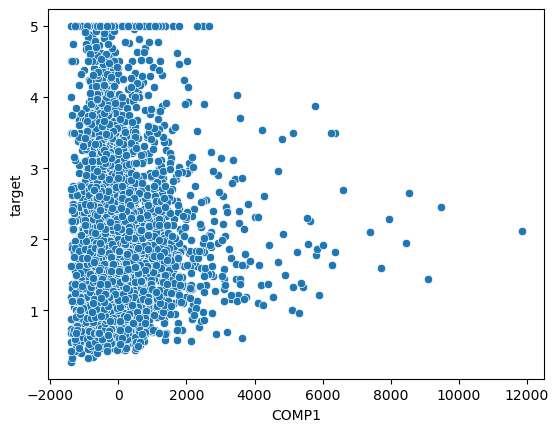

In [51]:
sns.scatterplot(data=df_pca,x='COMP1',y='target')

## SPLITTING DATA

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=32)

In [53]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
915,4.5317,26.0,6.135400,1.016313,1776.0,2.897227,37.52,-121.97
7236,2.5326,42.0,3.930279,1.015936,1841.0,3.667331,34.01,-118.14
16328,4.3008,33.0,6.314159,1.081858,1109.0,2.453540,38.02,-121.33
14720,4.1162,27.0,6.334225,0.989305,927.0,2.478610,32.80,-117.02
4289,1.2412,36.0,2.186111,1.166667,1506.0,4.183333,34.09,-118.31
...,...,...,...,...,...,...,...,...
6154,2.8375,21.0,5.286396,1.155131,1792.0,4.276850,34.09,-117.95
16656,1.6875,33.0,3.609544,0.986985,1077.0,2.336226,35.27,-120.66
17523,2.8940,52.0,4.157895,1.058271,1195.0,2.246241,37.33,-121.91
5990,5.8891,37.0,6.522642,1.026415,1344.0,2.535849,34.10,-117.73


In [54]:
y_train

915      2.326
7236     1.565
16328    1.364
14720    1.772
4289     2.167
         ...  
6154     1.665
16656    1.742
17523    2.095
5990     2.260
20073    1.048
Name: MedHouseVal, Length: 16512, dtype: float64

In [55]:
X_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
19955,0.8229,30.0,3.763819,1.075377,537.0,2.698492,36.21,-119.34
19047,4.8611,15.0,6.442065,0.977330,2540.0,3.198992,38.45,-121.83
10044,3.6700,14.0,5.939502,1.081851,1373.0,2.443060,39.27,-120.83
3069,1.5170,36.0,3.832134,1.062350,1658.0,3.976019,35.75,-119.25
5230,1.5132,37.0,4.141129,1.040323,824.0,3.322581,33.93,-118.24
...,...,...,...,...,...,...,...,...
4806,2.5156,49.0,4.136247,0.953728,896.0,2.303342,34.02,-118.34
11189,4.3583,36.0,6.113990,1.049223,1479.0,3.831606,33.82,-117.92
1128,2.5428,31.0,5.693208,1.199063,1026.0,2.402810,39.76,-121.61
3823,2.7118,25.0,3.841004,1.235983,2723.0,2.278661,34.20,-118.47


In [56]:
y_test

19955    0.684
19047    1.464
10044    1.601
3069     0.521
5230     0.863
         ...  
4806     1.366
11189    1.872
1128     0.850
3823     2.817
13991    0.798
Name: MedHouseVal, Length: 4128, dtype: float64

## CREATING MODEL 

In [57]:
from sklearn.linear_model import LinearRegression  
from sklearn.tree import DecisionTreeRegressor


In [58]:
# model=DecisionTreeRegressor() 

In [81]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split 
from sklearn.datasets import load_diabetes 
from sklearn.decomposition import PCA  
from sklearn.tree import  DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.neighbors import RadiusNeighborsRegressor 
from sklearn.cross_decomposition import PLSCanonical,PLSRegression
from sklearn.ensemble import ExtraTreesRegressor 
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import VotingRegressor 
def getModels(): 
   return {"LINEAR REGRESSION":LinearRegression(), 
    "RANDOM FOREST":RandomForestRegressor(max_depth=9,min_samples_leaf=4,min_samples_split=8,n_estimators=200),
    "ADA BOOST":AdaBoostRegressor(), 
    "DECISION TREE":DecisionTreeRegressor(), 
    "SGD":make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000, tol=1e-3)), 
    "KNN":KNeighborsRegressor(),
    "EXTRA TREES":ExtraTreesRegressor(random_state=0,max_depth=6),
    "GRADIENT BOOST":GradientBoostingRegressor(random_state=0) , 
    "XGREGRESSOR":XGBRegressor(max_depth=6)}

## TRAINING MODEL

In [82]:
# model.fit(X_train,y_train)

In [83]:
models=getModels() 
for i in models.keys(): 
    models[i].fit(X_train,y_train)

""" scores =cross_val_score(getModel(),X,y,cv=10) 
print("R2: ",np.absolute(np.mean(scores))) """ 

print('models loaded') 
models

models loaded


{'LINEAR REGRESSION': LinearRegression(),
 'RANDOM FOREST': RandomForestRegressor(max_depth=9, min_samples_leaf=4, min_samples_split=8,
                       n_estimators=200),
 'ADA BOOST': AdaBoostRegressor(),
 'DECISION TREE': DecisionTreeRegressor(),
 'SGD': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('sgdregressor', SGDRegressor())]),
 'KNN': KNeighborsRegressor(),
 'EXTRA TREES': ExtraTreesRegressor(max_depth=6, random_state=0),
 'GRADIENT BOOST': GradientBoostingRegressor(random_state=0),
 'XGREGRESSOR': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=N

## PREDICTING

In [84]:
scores={} 
predictions={} 
rmse={}  
mse={} 
metrics={}
from sklearn.metrics import mean_squared_error 
for i in models.keys():  
    predictions[i]=models[i].predict(X_test) 
    rmse[i]=mean_squared_error(y_test,predictions[i],squared=True)  
    mse[i]=mean_squared_error(y_test,predictions[i],squared=False) 
    metrics[i]={'MSE':mse[i],'RMSE':rmse[i]}
    scores[i]=rmse[i]


""" scores =cross_val_score(getModel(),X,y,cv=10) 
print("R2: ",np.absolute(np.mean(scores))) """ 


metrics 

{'LINEAR REGRESSION': {'MSE': 0.7430073310975429, 'RMSE': 0.5520598940646938},
 'RANDOM FOREST': {'MSE': 0.5352184673678431, 'RMSE': 0.28645880781158295},
 'ADA BOOST': {'MSE': 0.9536170221519839, 'RMSE': 0.9093854249380173},
 'DECISION TREE': {'MSE': 0.7157923571810902, 'RMSE': 0.5123586985988615},
 'SGD': {'MSE': 4873.26850187435, 'RMSE': 23748745.89136067},
 'KNN': {'MSE': 1.0552040859723784, 'RMSE': 1.1134556630528023},
 'EXTRA TREES': {'MSE': 0.7461298301505794, 'RMSE': 0.5567097234405325},
 'GRADIENT BOOST': {'MSE': 0.5205590276504499, 'RMSE': 0.27098170126838184},
 'XGREGRESSOR': {'MSE': 0.4657506705655639, 'RMSE': 0.21692368713227245}}

### getting best parameter for random forest

In [85]:
# uncomment if you want to find the best parameters for random forest(takes a long long time)
# param_grid = {
#     'n_estimators': [50, 100,200],
#     'max_depth': [5,6,8,9],
#     'min_samples_split': [4,5,8,10],s
#     'min_samples_leaf': [2, 4,6]
# }
# rf = RandomForestRegressor()

# # Create GridSearchCV 
# print('started grid search')
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# print('finish grid search')
# # Fit the model to the data 
# print('started fitting data')
# grid_search.fit(X_train, y_train)
# print('finished fitting data')
# # Get the best parameters 
# print('started printing params')
# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)

# # Make predictions using the best model 
# print('started predicitons')
# y_pred = grid_search.predict(X_test)

# # Evaluate the model 
# print('started evaluating model')
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error on Test Set:", mse)  
# print('started ving models')
# with open('grid_search_results.txt', 'w') as f:
#     f.write(f'Best Parameters: {best_params}\n')
#     f.write(f'Mean Squared Error on Test Set: {mse}\n')

### comparing each model

In [86]:
# plt.scatter(y_test, y_pred,edgecolor='black')
# plt.xlabel("True Values")
# plt.ylabel("Predictions")
# plt.title("True Values vs Predictions in Regression")
# plt.show()

['LINEAR REGRESSION', 'RANDOM FOREST', 'ADA BOOST', 'DECISION TREE', 'SGD', 'KNN', 'EXTRA TREES', 'GRADIENT BOOST', 'XGREGRESSOR']
9


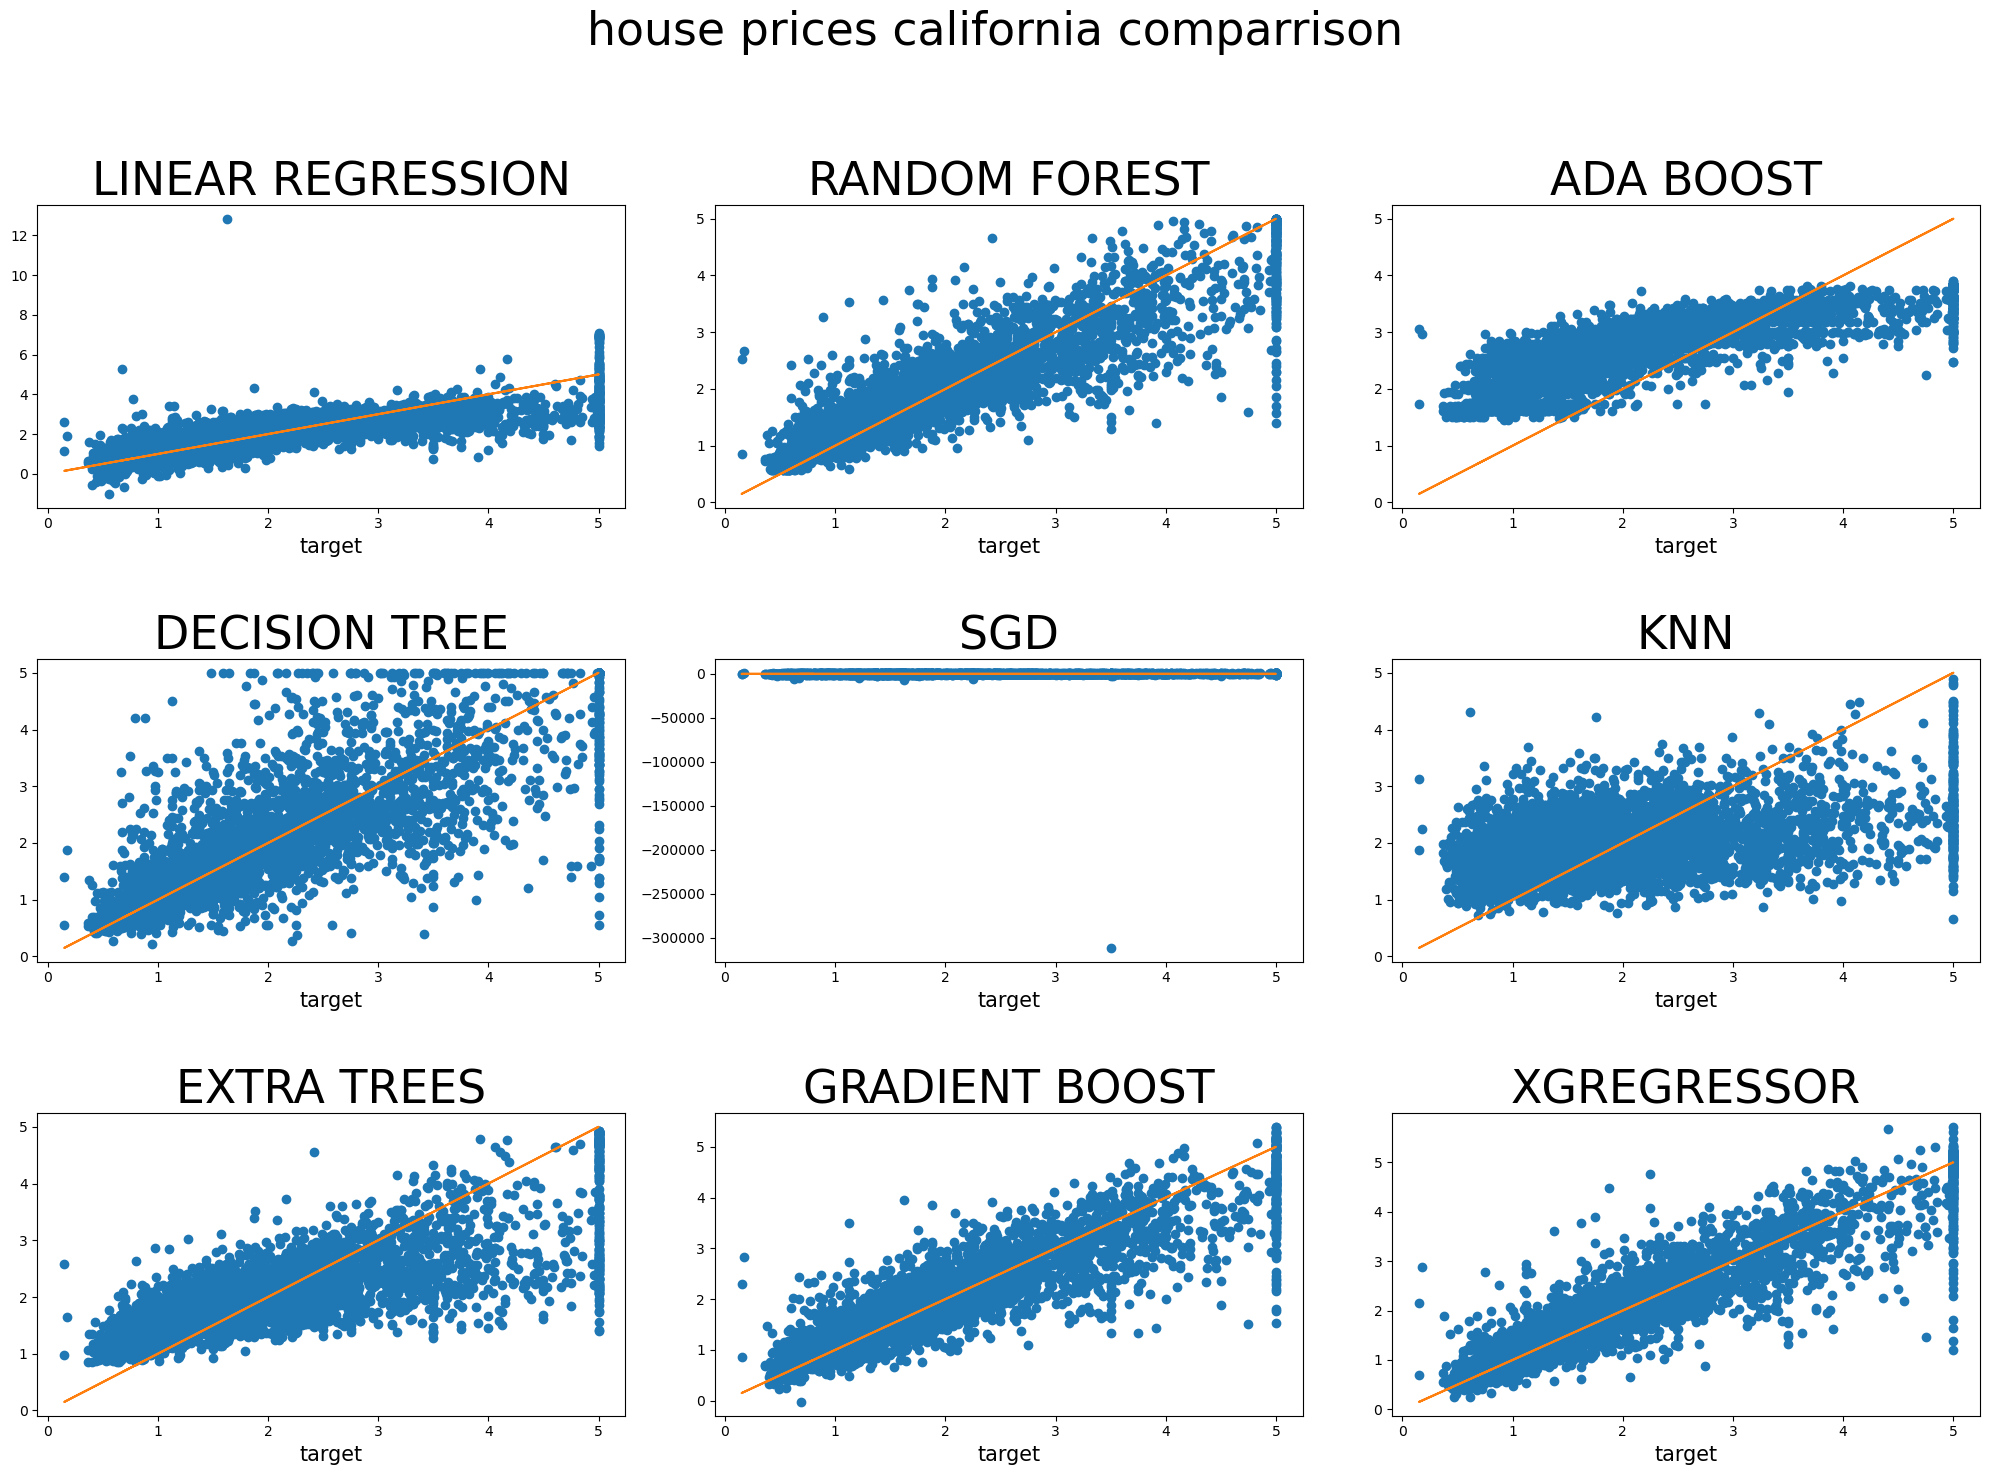

In [87]:
auxdic=scores
auxdic=list(auxdic.items())

fig,ax =plt.subplots(3,3) 
fig.suptitle("house prices california comparrison",size=33)   
fig.set_figwidth(20)
fig.set_figheight(15)
dimX=ax.shape[0] 
dimY=ax.shape[1] 
predictionsList= []
for i in predictions.keys():
    predictionsList.append(predictions[i]) 
predictionsList=np.transpose(predictionsList) 
predictionsList=pd.DataFrame(predictionsList,columns=models.keys())  

#print(predictions)
#predictions=np.transpose(pd.DataFrame(predictions)) 
m_keys=list(models.keys()) 
print(m_keys) 
print(len(m_keys))
for i in range(dimX): 
    for j in range(dimY) : 
        oneDIndex=(i*dimX)+j  
        ax[i,j].plot(y_test,predictions[m_keys[oneDIndex]],"o")  
        ax[i,j].set_title(m_keys[oneDIndex],size=33) 
        ax[i,j].set_xlabel("target",size=15) 
        ax[i,j].set_xbound(lower=0,upper=5)  
        m,b=np.polyfit(y_test,y_test,deg=1)
        ax[i,j].plot(y_test,m*y_test+b)
        # centerish=ax[i,j].get_xbound()[1]/2
        # centerishY=ax[i,j].get_ybound()[1]/2
        # ax[i,j].text(x=centerish-13,y=-centerishY/2.5,s=("R2:%f" % float(auxdic[oneDIndex][1])),ma="center")
fig.align_labels() 
fig.tight_layout()
fig.subplots_adjust(top=0.85,hspace=0.5)

In [88]:
# residuals = y_test - y_pred
# plt.hist(residuals, bins=50)
# plt.xlabel("Residuals")
# plt.ylabel("Frequency")
# plt.title("Distribution of Residuals in Regression")
# plt.show()

In [89]:
# plt.plot(y_test, label='True Values')
# plt.plot(y_pred, label='Predictions')
# plt.xlabel("Sample Index")
# plt.ylabel("Values")
# plt.title("True Values vs Predictions Across Samples")
# plt.legend()
# plt.show()